In [3]:
# Convert Nifti (nii) images to jpg images

import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
import os
import cv2
# import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt

def convers_nii2jpg(nii_folder_path="nii_imgs", jpg_folder_path="JPG_imgs"):
    # ,img_info_fn="Images3D_information.csv"):
    """
    Read images in 3D .nii format and convert them into .jpg images.
    Also extract image information from .nii image into .csv file.
    File "dicom_image_description.csv" consist of all available dicom image attributes and must be present in scripts directory.

    Inputs:
    nii_folder_path:  Specify the folder path for .nii 3D images. Default: "nii_imgs_3D".
    jpg_folder_path:  Specify the folder path for .jpg 3D images. Default: "JPG_imgs_3D".
                        If jpg_folder_path is missing, create default folder.
    img_info_fn:         Specify name for image information file. Default: "Images3D_information.csv"

    Returns:
    None
    """

    if os.path.exists(nii_folder_path):
        images_path = os.listdir(nii_folder_path)
    else:
        print(
            f"Folder path for .nii 3D images is missing. Create {nii_folder_path} folder and copy .nii 3D images into it")
        sys.exit(0)

    if not os.path.exists(jpg_folder_path):
        print(
            f"Folder path for .jpg 3D images is missing. Creating one: {jpg_folder_path}")
        os.mkdir(jpg_folder_path)

    # file "dicom_image_description.csv" consist of all available dicom image attributes
    # nifti_image_description_file = "nifti_image_description.csv"
    # if os.path.exists(nii_folder_path):
        # params = pd.read_csv(nifti_image_description_file)
    # else:
        # print(f"File {dicom_image_description_file} is absent.")
        # sys.exit(0)

    # Conversion
    for n, image in enumerate(images_path):
        if not image.endswith(".nii.gz"):
            continue
        img_path = os.path.join(nii_folder_path, image)
        # print(img_path)
        img = nib.load(img_path).get_fdata()
        img = (img - img.min()) / (img.max() - img.min()) * 255
        # print(img.shape)
        image = image.replace('.nii.gz', '')
        for i in tqdm(range(img.shape[2])):   # Прокрутите срез
            img_2d = img[:, :, i]  # Вынуть изображение
            # print(img_2d[232:270,232:270])

            # plt.imshow(img_2d)  # отображаемое изображение
            # plt.pause(0.001)
            cv2.imwrite(os.path.join(jpg_folder_path,
                        image+"_"+str(i)+'.jpg'), img_2d)


if __name__ == '__main__':
    # import argparse
    # parser = argparse.ArgumentParser()
    # parser.add_argument('-n', '--niipath', default="nii_imgs_3D",
                        # help='Specify the folder path for .nii 3D images. Default: "nii_imgs_3D".')
    # parser.add_argument('-j', '--jpgpath', default="JPG_imgs_3D",
                        # help='Specify the folder path for .jpg 3D images. Default: "JPG_imgs_3D".')
    # parser.add_argument('-i', '--info', default="Images3D_information.csv",
    # help='Specify name for image information file. Default: "Images3D_information.csv"')
    # args = parser.parse_args()
    # nii_folder_path = args.niipath
    # jpg_folder_path = args.jpgpath
    # img_info_fn = args.info
    convers_nii2jpg()  # , img_info_fn)



100%|██████████| 552/552 [00:02<00:00, 244.37it/s]


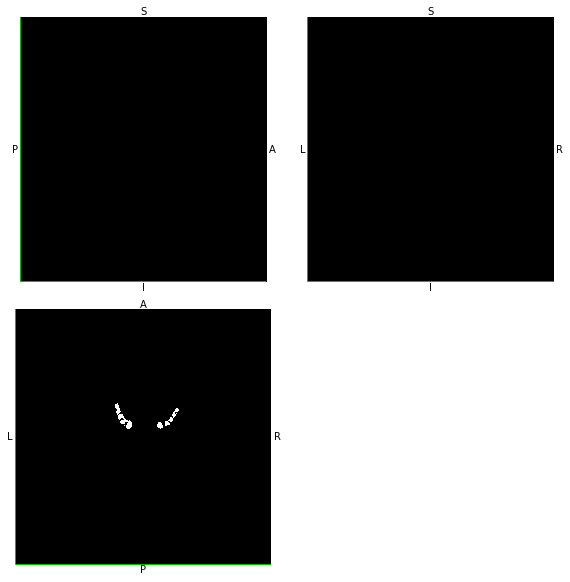

In [5]:
nii_folder_path = "nii_imgs/"
img = nib.load(nii_folder_path+"labels-139.nii.gz")

# Некоторые картинки могут быть четырехмерными
width, height, queue = img.dataobj.shape
OrthoSlicer3D(img.dataobj).show()


In [ ]:
hdr = img.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  75   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.00000e+00  7.03125e-01  7.03125e-01  5.00000e+00  0.00000e+00
  1.00000e+00  1.00000e+00  5.22410e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'None'
aux_file        : b'None'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 172.9
qoffse